In [1]:
# 2s

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import plotly.graph_objects as go

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='jbg030'
)

cursor = connection.cursor()

In [2]:
# 0s

# Function to validate date format
def validate_date(date_str):
    try:
        datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

while True:
    start_date = input("Please enter the start date (YYYY-MM-DD HH:MM:SS): ")
    if validate_date(start_date):
        break
    else:
        print("Invalid format. Please enter the date in the format YYYY-MM-DD HH:MM:SS")

while True:
    end_date = input("Please enter the end date (YYYY-MM-DD HH:MM:SS): ")
    if validate_date(end_date):
        break
    else:
        print("Invalid format. Please enter the date in the format YYYY-MM-DD HH:MM:SS")

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2019-05-01 00:00:00
End date: 2020-03-31 23:59:59


/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/292929451.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_timestamp = pd.read_sql(tweet_timestamps_query, connection)
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


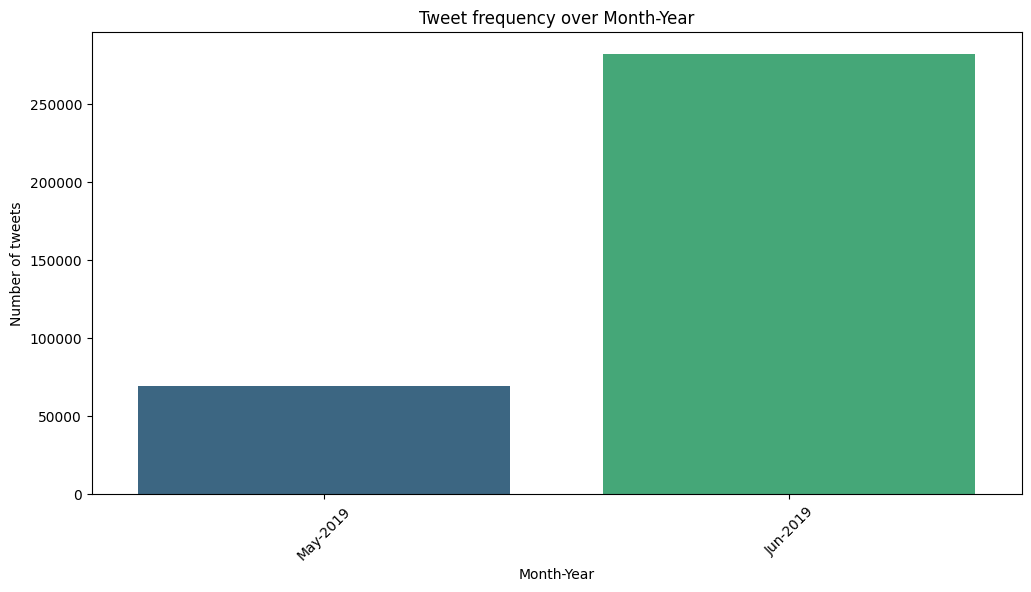

In [3]:
#Distribution of tweets grouped by month- 44s

tweet_timestamps_query = f"""
SELECT timestamp_ms 
FROM tweets 
WHERE timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

df_timestamp = pd.read_sql(tweet_timestamps_query, connection)

df_timestamp['datetime'] = pd.to_datetime(df_timestamp['timestamp_ms'], unit='ms') # Convert timestamp to a date time format

df_timestamp['datetime'] = df_timestamp['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

df_timestamp['month'] = df_timestamp['datetime'].dt.month # Extract the month when the conv starts

df_timestamp['month_year'] = df_timestamp['datetime'].dt.strftime('%b-%Y')

df_timestamp = df_timestamp.sort_values(by='datetime')

# Plot the distribution of tweets grouped by month-year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_timestamp, x='month_year', palette='viridis', order=pd.to_datetime(df_timestamp['month_year'], format='%b-%Y').sort_values().dt.strftime('%b-%Y').unique())
plt.title('Tweet frequency over Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.show()

In [4]:
# 0s

def get_count(query):
    cursor = connection.cursor()
    try:
        for result in cursor.execute(query, multi=True):
            if result.with_rows:
                first_result = result.fetchone()
                cursor.fetchall()  # Ensure all remaining rows are fetched
        return first_result[0] if first_result else 0
    finally:
        cursor.close()

/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

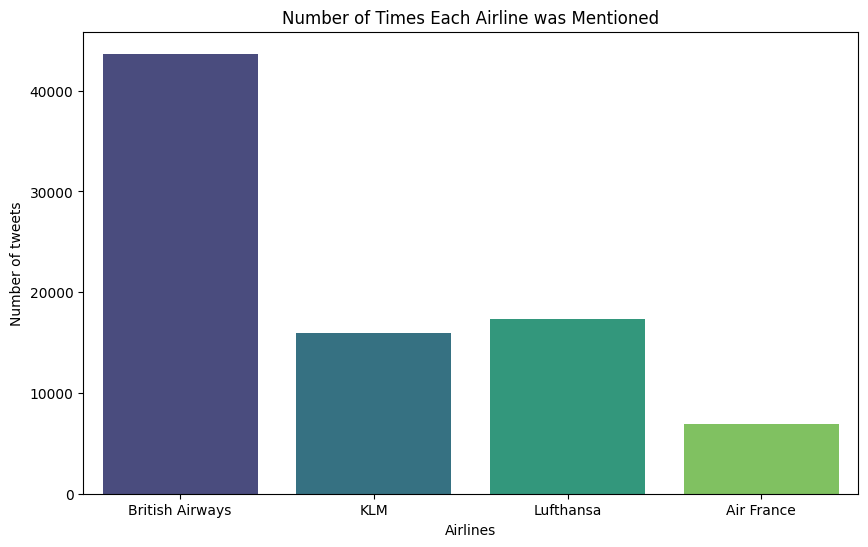

In [5]:
# Number of times an airline was mentioned- 15s

tweet_mentioned_ba = f"""
SELECT COUNT(DISTINCT id)
FROM tweets
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

tweet_mentioned_klm = f""" 
SELECT COUNT(DISTINCT id)
FROM tweets
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%')
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

tweet_mentioned_lufthansa = f""" 
SELECT COUNT(DISTINCT id)
FROM tweets
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%')
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

tweet_mentioned_af = f""" 
SELECT COUNT(DISTINCT id)
FROM tweets
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""


tweet_mentioned_ba_count = get_count(tweet_mentioned_ba)
tweet_mentioned_klm_count = get_count(tweet_mentioned_klm)
tweet_mentioned_lufthansa_count = get_count(tweet_mentioned_lufthansa)
tweet_mentioned_af_count = get_count(tweet_mentioned_af)

airlines = ['British Airways', 'KLM', 'Lufthansa', 'Air France']
counts = [
    tweet_mentioned_ba_count, 
    tweet_mentioned_klm_count, 
    tweet_mentioned_lufthansa_count, 
    tweet_mentioned_af_count
]

plt.figure(figsize=(10, 6))
sns.barplot(x=airlines, y=counts, palette='viridis')
plt.title('Number of Times Each Airline was Mentioned')
plt.xlabel('Airlines')
plt.ylabel('Number of tweets')
plt.show()

/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

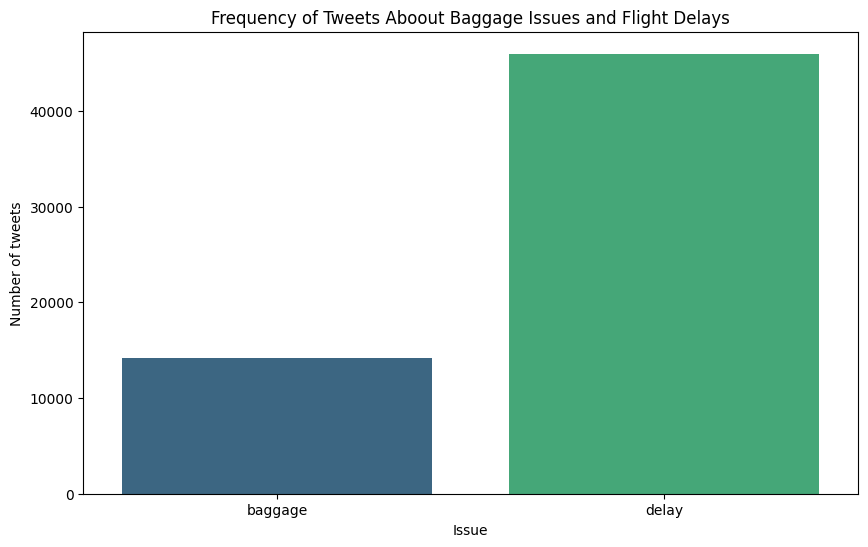

In [6]:
# Frequency of tweets about baggage isssues and flight delays- 3 s

baggage_query = f"""
SELECT COUNT(id)
FROM tweets
WHERE baggage = 1
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
""" 

flight_delays_query = f"""
SELECT COUNT(id)
FROM tweets
WHERE delay_and_cancellation = 1
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
""" 

issue = ['baggage', 'delay']
issue_counts = [get_count(baggage_query), get_count(flight_delays_query)]

plt.figure(figsize=(10, 6))
sns.barplot(x=issue, y=issue_counts, palette='viridis')
plt.title('Frequency of Tweets Aboout Baggage Issues and Flight Delays')
plt.xlabel('Issue')
plt.ylabel('Number of tweets')
plt.show()
    

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/24024043.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_start = pd.read_sql(conv_start, connection)
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarn

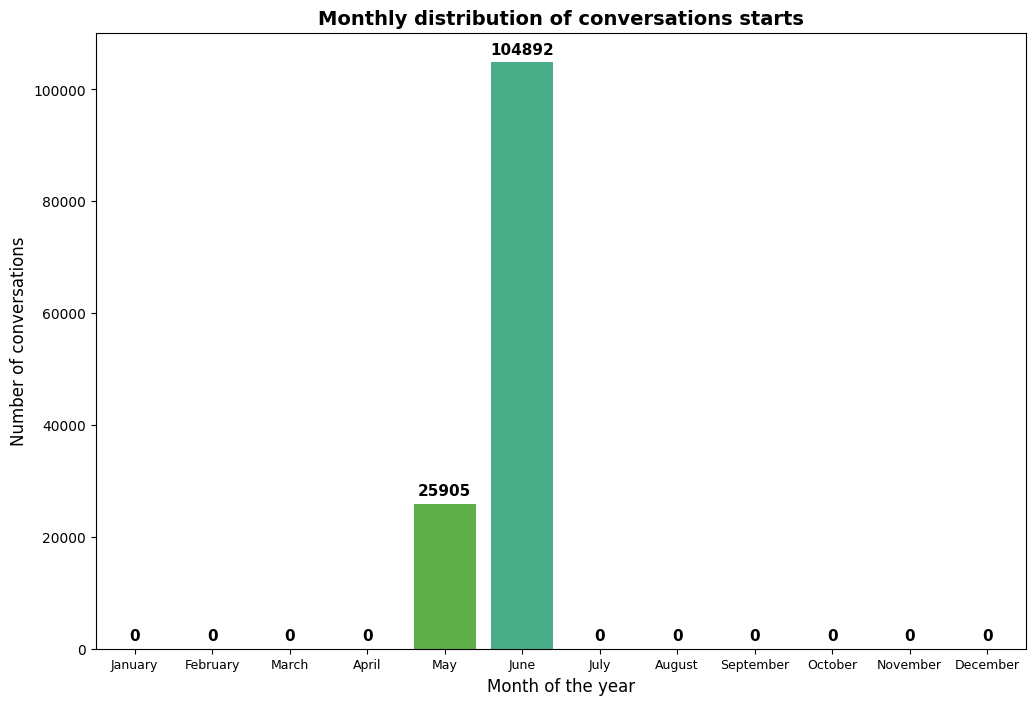

In [7]:
# General statistics about conversations- 6 s

# Extract conversation starts time units for all connversations
conv_start = f"""
SELECT start 
FROM conversations 
WHERE start >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

df_start = pd.read_sql(conv_start, connection)

df_start['datetime'] = pd.to_datetime(df_start['start'], unit='ms') # Convert timestamp to a date time format

df_start['datetime'] = df_start['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

df_start['month'] = df_start['datetime'].dt.month # Extract the month when the conv starts

monthly_distribution = df_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() # Count the number of conversations starting on each month

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values)
plt.xlabel('Month of the year', fontsize=12)
plt.ylabel('Number of conversations', fontsize=12)
plt.title('Monthly distribution of conversations starts', fontsize=14, weight='bold')
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize = 9)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, weight='bold', color='black')

plt.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/2928642388.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/2928642388.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/2928642388.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y

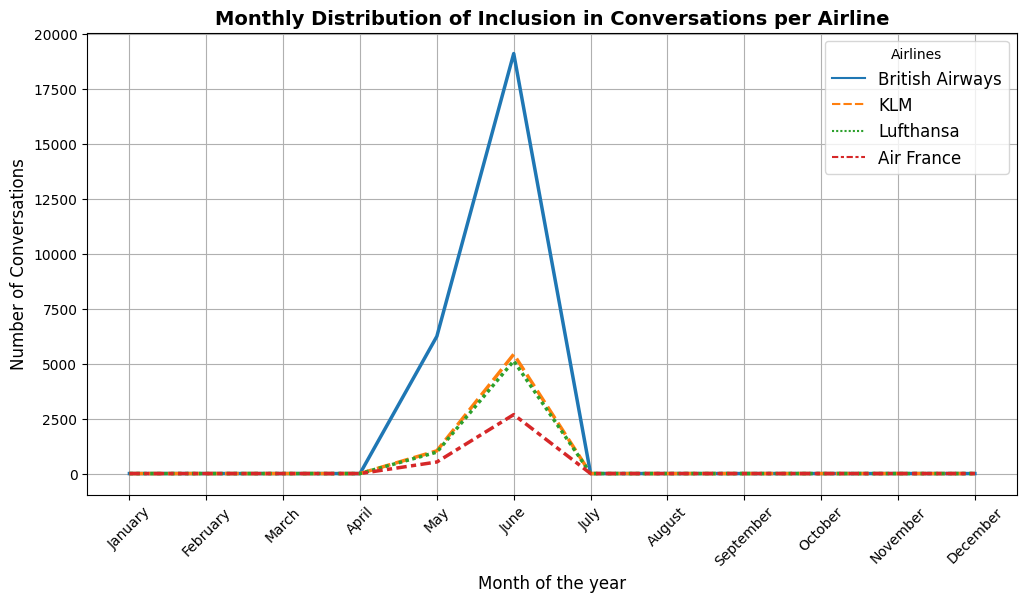

In [8]:
# Airline specific conversation statistics- 1m 18s

# Extract conversation starts time units for conversations per airline
def extract_month(query, connection):

    df = pd.read_sql(query, connection)

    df['datetime'] = pd.to_datetime(df['start'], unit='ms') # Convert timestamp to a date time format

    df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

    df['month'] = df['datetime'].dt.month # Extract the month when the conv starts

    return df

british_airways_conv_start_query = f"""
SELECT DISTINCT conversations.conversation_id, conversations.start
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id 
WHERE (tweets.user_mentions LIKE '%18332190%' 
    OR tweets.mentioned_airlines LIKE '%British_Airways%' 
    OR conversations.airline LIKE '%British_Airways%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""
KLM_conv_start_query = f""" 
SELECT DISTINCT conversations.conversation_id, conversations.start
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id 
WHERE (tweets.user_mentions LIKE '%56377143%' 
    OR tweets.mentioned_airlines LIKE '%KLM%' 
    OR conversations.airline LIKE '%KLM%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""
lufthansa_conv_start_query = f""" 
SELECT DISTINCT conversations.conversation_id, conversations.start
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id 
WHERE (tweets.user_mentions LIKE '%124476322%' 
    OR tweets.mentioned_airlines LIKE '%lufthansa%' 
    OR conversations.airline LIKE '%lufthansa%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""
air_france_conv_start_query = f""" 
SELECT DISTINCT conversations.conversation_id, conversations.start
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id 
WHERE (tweets.user_mentions LIKE '%106062176%' 
    OR tweets.mentioned_airlines LIKE '%AirFrance%' 
    OR conversations.airline LIKE '%AirFrance%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

british_airways_conv_start = extract_month(british_airways_conv_start_query, connection)
KLM_conv_start = extract_month(KLM_conv_start_query, connection)
lufthansa_conv_start = extract_month(lufthansa_conv_start_query, connection)
air_france_conv_start = extract_month(air_france_conv_start_query, connection) 

# Count the number of conversations starting each month
british_airways_monthly_distribution = british_airways_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() 
KLM_monthly_distribution = KLM_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() 
lufthansa_monthly_distribution = lufthansa_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index() 
air_france_monthly_distribution = air_france_conv_start['month'].value_counts().reindex(range(1, 13), fill_value=0).sort_index()

# Concatenate data frames into one data frame
airlines_monthly_distribution_df = pd.concat([british_airways_monthly_distribution, KLM_monthly_distribution, lufthansa_monthly_distribution, air_france_monthly_distribution], axis = 1)
airlines_monthly_distribution_df.columns = ['British Airways', 'KLM', 'Lufthansa', 'Air France']

# Plot the monthly distribution data frame
plt.figure(figsize=(12, 6))
sns.lineplot(data=airlines_monthly_distribution_df, linewidth=2.5)

plt.title('Monthly Distribution of Inclusion in Conversations per Airline', fontsize=14, weight='bold')
plt.xlabel('Month of the year', fontsize=12)
plt.ylabel('Number of Conversations', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=45)
plt.legend(title='Airlines', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

In [9]:
# Queries for number of conversations where an airline was mentioned per airline- 0s
conv_mentioned_ba = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_mentioned_klm = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_mentioned_lufthansa = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_mentioned_af = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

# Queries for number of conversations where an airline was mentioned and the airline replied

conv_replies_mentioned_ba = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
    AND conversations.airline LIKE '%British_Airways%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_replies_mentioned_klm = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%') 
    AND conversations.airline LIKE '%KLM%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_replies_mentioned_lufthansa = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%') 
    AND conversations.airline LIKE '%Lufthansa%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_replies_mentioned_af = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
    AND conversations.airline LIKE '%AirFrance%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

# Queries for number of conversations where an airline was mentioned and the airline did not reply

conv_non_replies_where_mentioned_ba = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
  AND conversations.airline NOT LIKE '%British_Airways%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_non_replies_where_mentioned_klm = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%')
  AND conversations.airline NOT LIKE '%KLM%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_non_replies_where_mentioned_lufthansa = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%')
  AND conversations.airline NOT LIKE '%Lufthansa%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_non_replies_where_mentioned_af = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
  AND conversations.airline NOT LIKE '%AirFrance%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

In [10]:
# 2m 30s

mentioned_ba_count = get_count(conv_mentioned_ba)
replies_mentioned_ba_count = get_count(conv_replies_mentioned_ba)
non_replies_where_mentioned_ba_count = get_count(conv_non_replies_where_mentioned_ba)

mentioned_klm_count = get_count(conv_mentioned_klm)
replies_mentioned_klm_count = get_count(conv_replies_mentioned_klm)
non_replies_where_mentioned_klm_count = get_count(conv_non_replies_where_mentioned_klm)

mentioned_lufthansa_count = get_count(conv_mentioned_lufthansa)
replies_mentioned_lufthansa_count = get_count(conv_replies_mentioned_lufthansa)
non_replies_where_mentioned_lufthansa_count = get_count(conv_non_replies_where_mentioned_lufthansa)

mentioned_af_count = get_count(conv_mentioned_af)
replies_mentioned_af_count = get_count(conv_replies_mentioned_af)
non_replies_where_mentioned_af_count = get_count(conv_non_replies_where_mentioned_af)

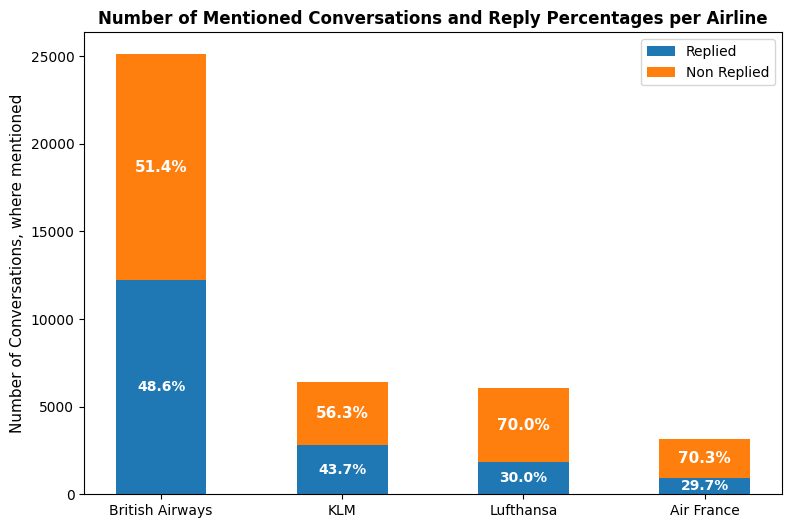

In [11]:
# 0s

replied_percentage_ba = replies_mentioned_ba_count / mentioned_ba_count * 100
non_replied_percentage_ba = non_replies_where_mentioned_ba_count / mentioned_ba_count * 100

replied_percentage_klm = replies_mentioned_klm_count / mentioned_klm_count * 100
non_replied_percentage_klm = non_replies_where_mentioned_klm_count / mentioned_klm_count * 100

replied_percentage_lufthansa = replies_mentioned_lufthansa_count / mentioned_lufthansa_count * 100
non_replied_percentage_lufthansa = non_replies_where_mentioned_lufthansa_count / mentioned_lufthansa_count * 100

replied_percentage_af = replies_mentioned_af_count / mentioned_af_count * 100
non_replied_percentage_af = non_replies_where_mentioned_af_count / mentioned_af_count * 100

mentioned_convs = [mentioned_ba_count, mentioned_klm_count, mentioned_lufthansa_count, mentioned_af_count]
replied_percentages = [replied_percentage_ba, replied_percentage_klm, replied_percentage_lufthansa, replied_percentage_af]
non_replied_percentages = [non_replied_percentage_ba, non_replied_percentage_klm, non_replied_percentage_lufthansa, non_replied_percentage_af]

replied_counts = [replies_mentioned_ba_count, replies_mentioned_klm_count, replies_mentioned_lufthansa_count, replies_mentioned_af_count]
non_replied_counts = [non_replies_where_mentioned_ba_count, non_replies_where_mentioned_klm_count, non_replies_where_mentioned_lufthansa_count, non_replies_where_mentioned_af_count]

bar_width = 0.5
ind = range(len(airlines))

fig, ax = plt.subplots(figsize = (9, 6))

p1 = ax.bar(ind, replied_counts, bar_width, label='Replied')
p2 = ax.bar(ind, non_replied_counts, bar_width, bottom=replied_counts, label='Non Replied')

ax.set_ylabel('Number of Conversations, where mentioned', fontsize= 11)
ax.set_title('Number of Mentioned Conversations and Reply Percentages per Airline', fontsize= 12, weight= 'bold')
ax.set_xticks(ind)
ax.set_xticklabels(airlines)
ax.legend(fontsize=10)

for i in range(len(airlines)):
    ax.text(i, replied_counts[i] / 2, f"{replied_percentages[i]:.1f}%", ha='center', va='center', color='white', weight='bold', fontsize=10)
    ax.text(i, replied_counts[i] + non_replied_counts[i] / 2, f"{non_replied_percentages[i]:.1f}%", ha='center', va='center', color='white', weight='bold', fontsize=11)

plt.show()

In [22]:
# 14s

all_tweets_query = f"""SELECT text, user_id, mentioned_airlines, user_mentions, label, timestamp_ms, baggage, money, staff, delay_and_cancellation
            FROM tweets
            WHERE timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
                AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000 
                AND ((
                tweets.mentioned_airlines LIKE '%AirFrance%'
                OR tweets.mentioned_airlines LIKE '%Lufthansa%'
                OR tweets.mentioned_airlines LIKE '%KLM%'
                OR tweets.mentioned_airlines LIKE '%British Airways%'
            )
            OR (
                tweets.user_mentions LIKE '%106062176%'
                OR tweets.user_mentions LIKE '%124476322%'
                OR tweets.user_mentions LIKE '%56377143%'
                OR tweets.user_mentions LIKE '%18332190%'
            ))"""

cursor.execute(all_tweets_query)
texts = cursor.fetchall()
print("Text fetched.")
number_tweets = cursor.rowcount
print("Total number of rows in table: ", number_tweets)

df = pd.DataFrame(texts, columns=['text', 'user_id', 'mentioned_airlines', 'user_mentions', 'label', 'timestamp', 'baggage', 'money', 'staff', 'delay_and_cancellation'])

df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms') 

df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

df['month'] = df['datetime'].dt.month

Text fetched.
Total number of rows in table:  632268


/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



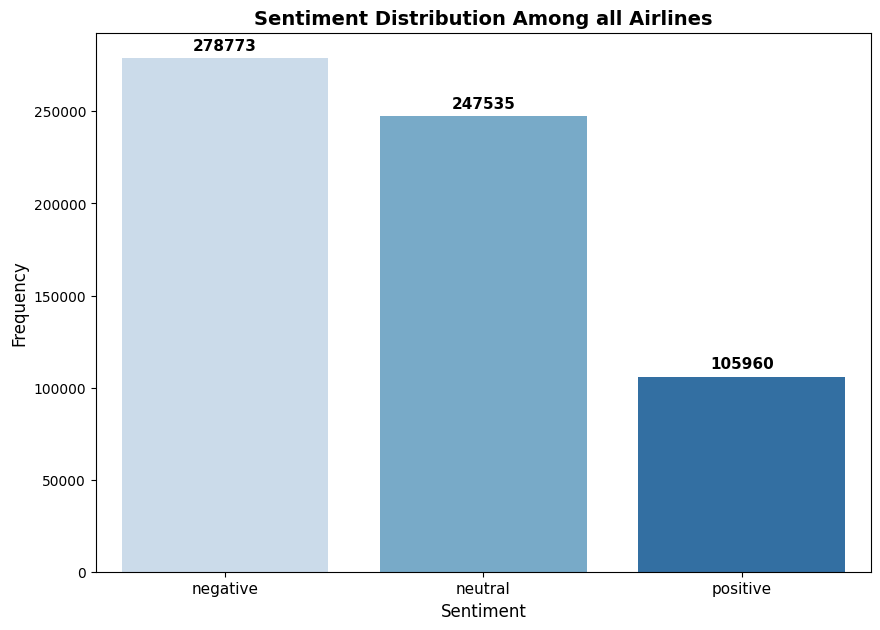

In [23]:
# Setiment distribution among all airlines- 0s

sentiment_counts = df['label'].value_counts()

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')

plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sentiment Distribution Among all Airlines', fontsize=14, weight='bold')
plt.xticks(fontsize=11)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, weight='bold', color='black')

plt.show()

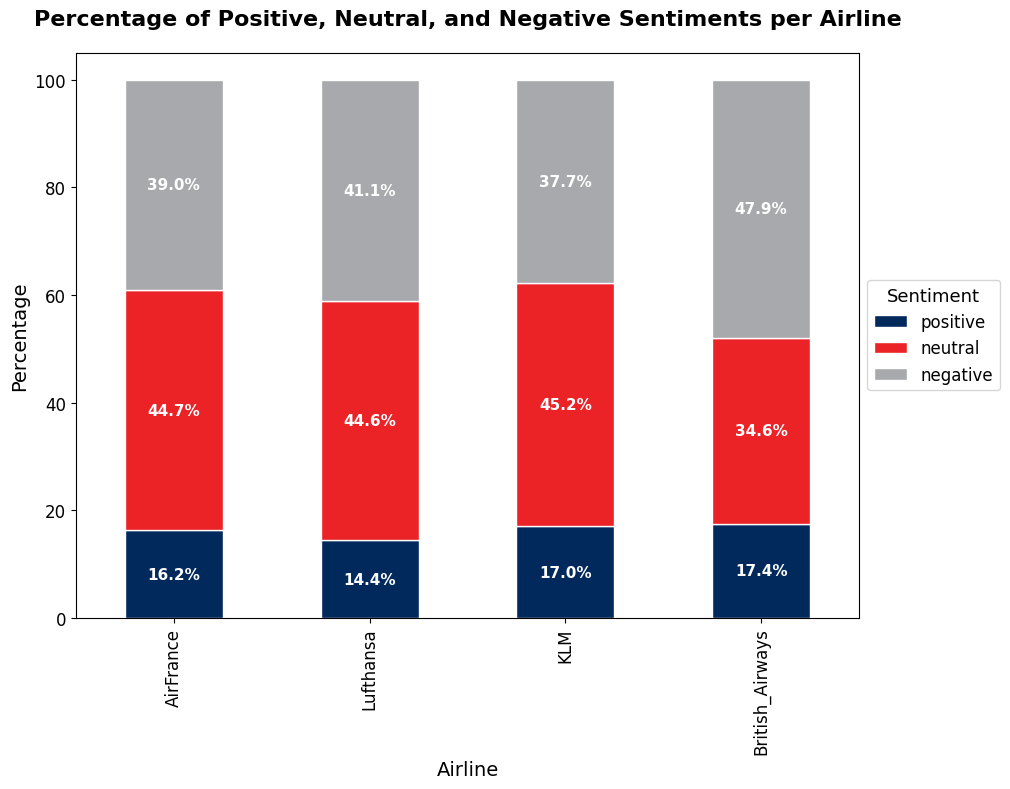

In [24]:
# Percentage of Positive, Neutral, and Negative Sentiments per Airline- 2s

df['AirFrance'] = df['mentioned_airlines'].apply(lambda x: 'AirFrance' in x) | df['user_mentions'].apply(lambda x: '106062176' in x)
df['Lufthansa'] = df['mentioned_airlines'].apply(lambda x: 'Lufthansa' in x) | df['user_mentions'].apply(lambda x: '124476322' in x)
df['KLM'] = df['mentioned_airlines'].apply(lambda x: 'KLM' in x) | df['user_mentions'].apply(lambda x: '56377143' in x)
df['British_Airways'] = df['mentioned_airlines'].apply(lambda x: 'British_Airways' in x) | df['user_mentions'].apply(lambda x: '18332190' in x)

airlines_2 = ['AirFrance', 'Lufthansa', 'KLM', 'British_Airways']
sentiments = ['positive', 'neutral', 'negative']

data = []
for airline in airlines_2:
    sentiment_counts = []
    for sentiment in sentiments:
        count = df[df[airline] & (df['label'] == sentiment)].shape[0]
        sentiment_counts.append(count)
    total = sum(sentiment_counts)
    percentages = [(count / total) * 100 if total > 0 else 0 for count in sentiment_counts]
    data.append(percentages)

plot_df = pd.DataFrame(data, columns=sentiments, index=airlines_2)

fig, ax = plt.subplots(figsize=(12, 8))

# Create the stacked bar plot
custom_colors = ['#01295C', '#EB2226', '#A7A9AC', '#B9CFED']

plot_df.plot(kind='bar', stacked=True, color=custom_colors, ax=ax, edgecolor='white')

for i, airline in enumerate(airlines_2):
    pos_base = 0
    neu_base = plot_df.loc[airline, 'positive']
    neg_base = plot_df.loc[airline, 'positive'] + plot_df.loc[airline, 'neutral']
    for sentiment in sentiments:
        count = plot_df.loc[airline, sentiment]
        percentage = f"{count:.1f}%"
        if sentiment == 'positive':
            ax.text(i, pos_base + count / 2, percentage, ha='center', va='center', fontsize=11, weight='bold', color='white')
            pos_base += count
        elif sentiment == 'neutral':
            ax.text(i, neu_base + count / 2, percentage, ha='center', va='center', fontsize=11, weight='bold', color='white')
            neu_base += count
        else:
            ax.text(i, neg_base + count / 2, percentage, ha='center', va='center', fontsize=11, weight='bold', color='white')
            neg_base += count

            
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xlabel('Airline', fontsize=14)
ax.set_title('Percentage of Positive, Neutral, and Negative Sentiments per Airline', fontsize=16, weight='bold', pad=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title='Sentiment', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/2199397685.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  klm_df = pd.read_sql(klm_query, connection)


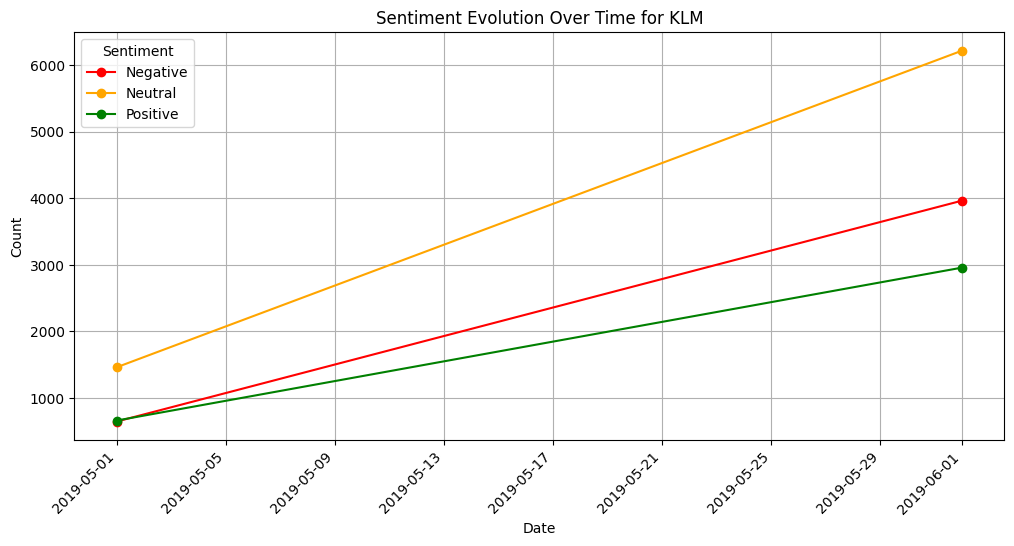

In [15]:
#Sentiment change through months for KLM- 6s

klm_query = f"""
SELECT text, label, timestamp_ms
FROM tweets
WHERE (mentioned_airlines LIKE '%%KLM%%' OR user_mentions LIKE '%%56377143%%')
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

# Load the result of the query into a DataFrame
klm_df = pd.read_sql(klm_query, connection)

# Convert the datetime column to pandas datetime
klm_df['datetime'] = pd.to_datetime(klm_df['timestamp_ms'], unit='ms')

klm_df['datetime'] = klm_df['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

klm_df['month'] = klm_df['datetime'].dt.month

klm_df = klm_df.sort_values(by='datetime')

klm_df['month_year'] = klm_df['datetime'].dt.strftime('%b-%Y')

# Count occurrences of each label per month
label_counts = klm_df.groupby(['month_year', 'label']).size().unstack(fill_value=0)

label_counts.index = pd.to_datetime(label_counts.index, format='%b-%Y')

# Sort the label_counts DataFrame by the index
label_counts = label_counts.sort_index()

# Plot the distribution of tweets grouped by month-year
plt.figure(figsize=(12, 6))
label_counts.plot(kind='line', marker='o', ax=plt.gca(), color=['red', 'orange', 'green'])
plt.title('Sentiment Evolution Over Time for KLM')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/3851941974.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tweets_british_airways = pd.read_sql(query, connection)


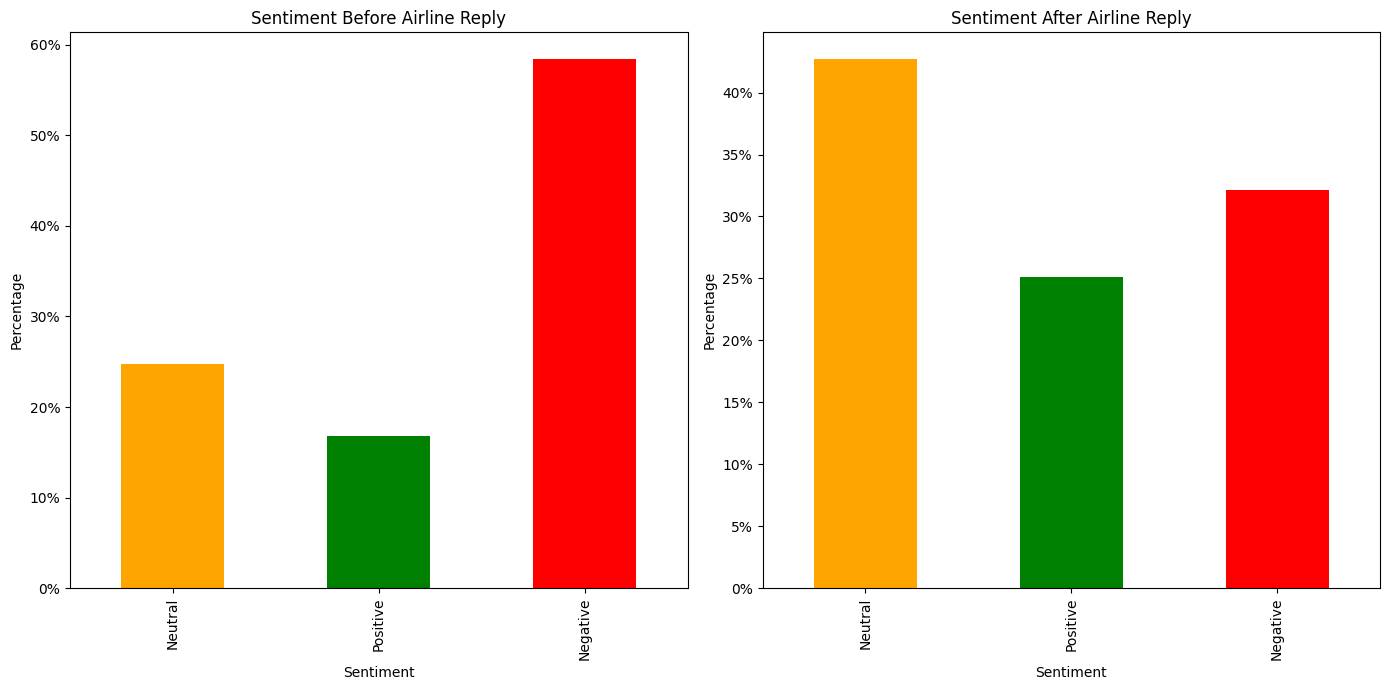

In [16]:
# Exploration of sentiment evolution- 2m

from matplotlib.ticker import FuncFormatter

airline_user_id = 18332190  # Replace with actual user ID for the airline


# Define the query to get all tweets in the conversations involving British Airways
query = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%%British_Airways%%'
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways = pd.read_sql(query, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways['datetime'] = pd.to_datetime(df_tweets_british_airways['timestamp_ms'])

df_tweets_british_airways['datetime'] = df_tweets_british_airways['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_before_reply = []
sentiments_after_reply = []

# Group tweets by conversation_id
grouped = df_tweets_british_airways.groupby('conversation_id')


# Process each conversation
for conversation_id, group in grouped:
    # Identify the timestamp of the airline's reply
    airline_reply = group[group['user_id'] == airline_user_id]
    if not airline_reply.empty:
        airline_reply_time = airline_reply['datetime'].iloc[0]

        # Tweets before the airline reply
        tweets_before_reply = group[group['datetime'] < airline_reply_time]
        sentiments_before_reply.extend(tweets_before_reply['label'].tolist())
        
        # Tweets after the airline reply
        tweets_after_reply = group[group['datetime'] >= airline_reply_time]
        sentiments_after_reply.extend(tweets_after_reply['label'].tolist())

# Convert to DataFrame for plotting
df_before_reply = pd.DataFrame(sentiments_before_reply, columns=['label'])
df_after_reply = pd.DataFrame(sentiments_after_reply, columns=['label'])

# Calculate percentages
before_counts = df_before_reply['label'].value_counts(normalize=True) * 100
after_counts = df_after_reply['label'].value_counts(normalize=True) * 100

# Plot sentiment before and after the reply
plt.figure(figsize=(14, 7))

# Sentiment before reply
plt.subplot(1, 2, 1)
before_counts.reindex(['neutral', 'positive', 'negative'], fill_value=0).plot(kind='bar', color=['orange', 'green', 'red'])
plt.title('Sentiment Before Airline Reply')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Neutral', 'Positive', 'Negative'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Sentiment after reply
plt.subplot(1, 2, 2)
after_counts.reindex(['neutral', 'positive', 'negative'], fill_value=0).plot(kind='bar', color=['orange', 'green', 'red'])
plt.title('Sentiment After Airline Reply')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Neutral', 'Positive', 'Negative'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.tight_layout()
plt.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2856743833.py:22: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



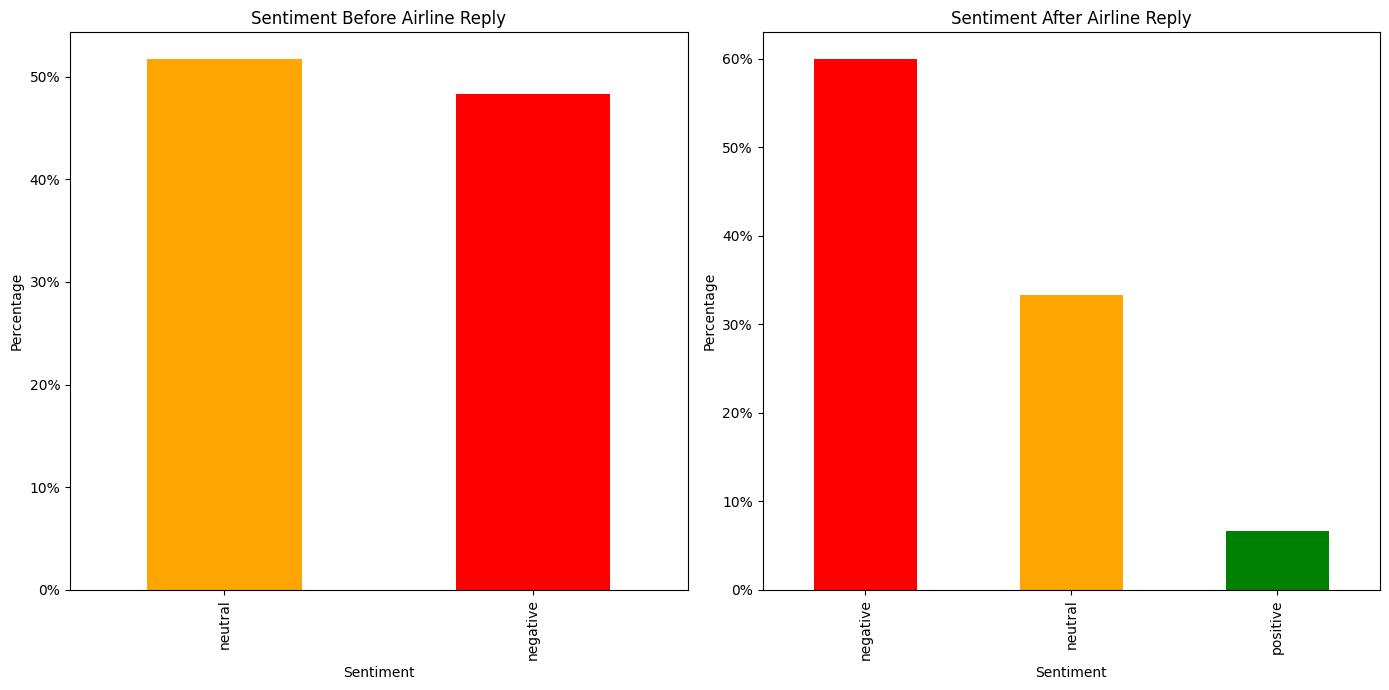

In [29]:
# Distribution of sentiment percentages before and after an airline reply in a single conversation- 1s

from matplotlib.ticker import FuncFormatter
query = f"""
SELECT tweets.text,tweets.label, tweets.user_id, tweets.timestamp_ms
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.conversation_id = (
    SELECT conversation_id
    FROM conversations
    WHERE airline LIKE '%%British_Airways%%'
    ORDER BY length DESC
    LIMIT 1
    )
    AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""
airline_user_id = 18332190
# Load the result of the query into a DataFrame
df_tweets_in_max_conversation = pd.read_sql(query, connection)

df_tweets_in_max_conversation['datetime'] = pd.to_datetime(df_tweets_in_max_conversation['timestamp_ms'], unit='ms')

df_tweets_in_max_conversation['datetime'] = df_tweets_in_max_conversation['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')


# Identify the timestamp of the airline's reply
airline_reply = df_tweets_in_max_conversation[df_tweets_in_max_conversation['user_id'] == airline_user_id]
if not airline_reply.empty:
    airline_reply_time = airline_reply['datetime'].iloc[0]
else:
    airline_reply_time = None

if airline_reply_time is not None:
    # Tweets before the airline reply
    tweets_before_reply = df_tweets_in_max_conversation[df_tweets_in_max_conversation['datetime'] < airline_reply_time]
    
    # Tweets after the airline reply
    tweets_after_reply = df_tweets_in_max_conversation[df_tweets_in_max_conversation['datetime'] >= airline_reply_time]

if airline_reply_time is not None:
    # Calculate sentiment percentages
    before_counts = tweets_before_reply['label'].value_counts(normalize=True) * 100
    after_counts = tweets_after_reply['label'].value_counts(normalize=True) * 100
    
    # Plot sentiment before and after the reply
    plt.figure(figsize=(14, 7))
    
    # Sentiment before reply
    plt.subplot(1, 2, 1)
    before_counts.plot(kind='bar', color=['orange', 'red', 'green'])
    plt.title('Sentiment Before Airline Reply')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
    
    # Sentiment after reply
    plt.subplot(1, 2, 2)
    after_counts.plot(kind='bar', color=['red', 'orange', 'green'])
    plt.title('Sentiment After Airline Reply')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
    
    plt.tight_layout()
    plt.show()
else:
    print("No airline reply found, unable to plot sentiment comparison.")

In [30]:
# Creates the Dataframe for British Airways- 17 s

conv_ba1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%British_Airways%'
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;   
"""
conv_ba2 = """
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%British_Airways%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
    ); 
"""

df_ba1 = pd.read_sql(conv_ba1, connection)
df_ba2 = pd.read_sql(conv_ba2, connection)

df_ba = pd.concat([df_ba1, df_ba2], ignore_index=True, axis=0)
df_ba = df_ba.drop_duplicates()

df_ba['datetime'] = pd.to_datetime(df_ba['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/549450961.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/549450961.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [31]:
# Creates the dataframe for AirFrance- 6s

conv_af1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%AirFrance%'
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""
conv_af2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%AirFrance%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000   
    );
"""

df_af1 = pd.read_sql(conv_af1, connection)
df_af2 = pd.read_sql(conv_af2, connection)

df_af = pd.concat([df_af1, df_af2], ignore_index=True, axis=0)
df_af = df_af.drop_duplicates()

df_af['datetime'] = pd.to_datetime(df_af['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/1428863750.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/1428863750.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [32]:
# Creates the dataframe for KLM- 7s

conv_klm1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%KLM%'
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""
conv_klm2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%KLM%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
    );
"""

df_klm1 = pd.read_sql(conv_klm1, connection)
df_klm2 = pd.read_sql(conv_klm2, connection)

df_klm = pd.concat([df_klm1, df_klm2], ignore_index=True, axis=0)
df_klm = df_klm.drop_duplicates()

df_klm['datetime'] = pd.to_datetime(df_klm['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2903821447.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2903821447.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [33]:
# Creates the dataframe for Lufthansa- 7s

conv_lh1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%Lufthansa%'
       AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
       AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""
conv_lh2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%Lufthansa%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
    );
"""

df_lh1 = pd.read_sql(conv_lh1, connection)
df_lh2 = pd.read_sql(conv_lh2, connection)

df_lh = pd.concat([df_lh1, df_lh2], ignore_index=True, axis=0)
df_lh = df_lh.drop_duplicates()

df_lh['datetime'] = pd.to_datetime(df_lh['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3401460410.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3401460410.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [34]:
# 0s

columns_drop = ['text', 'id', 'timestamp_ms', 'datetime']

df_topics_ba = df_ba.drop(columns=columns_drop)
df_topics_af = df_af.drop(columns=columns_drop)
df_topics_klm = df_klm.drop(columns=columns_drop)
df_topics_lh = df_lh.drop(columns=columns_drop)

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/4002035344.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/4002035344.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/4002035344.py:22: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/

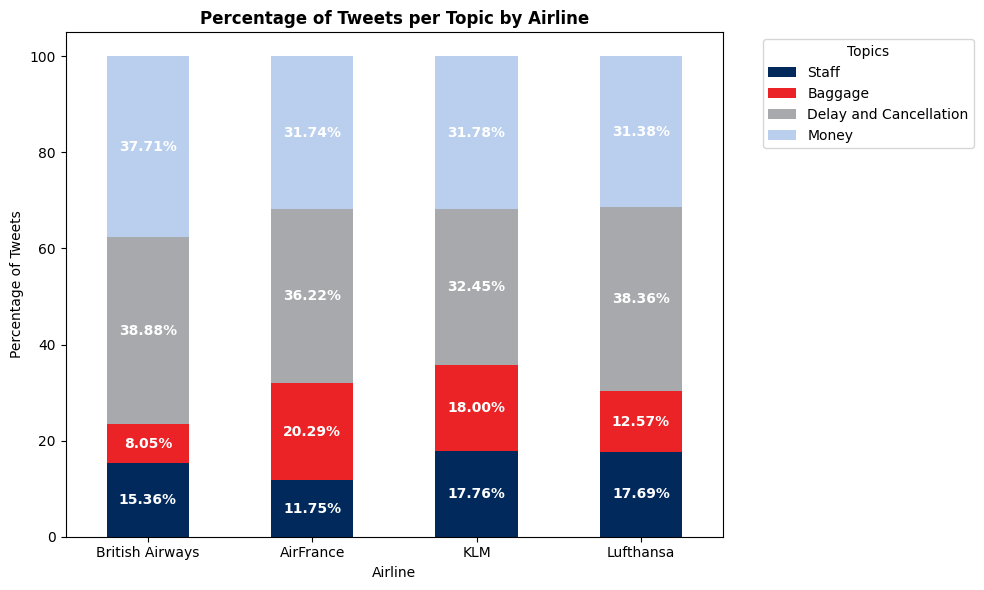

In [35]:
# 0s

counts_ba = df_topics_ba.apply(lambda col: col.value_counts().get(1, 0))
counts_af = df_topics_af.apply(lambda col: col.value_counts().get(1, 0))
counts_klm = df_topics_klm.apply(lambda col: col.value_counts().get(1, 0))
counts_lh = df_topics_lh.apply(lambda col: col.value_counts().get(1, 0))

counts_ba_sum = counts_ba.sum()
counts_af_sum = counts_af.sum()
counts_klm_sum = counts_klm.sum()
counts_lh_sum = counts_lh.sum()

percentages_ba = round((counts_ba / counts_ba_sum) * 100, 2)
percentages_af = round((counts_af / counts_af_sum) * 100, 2)
percentages_klm = round((counts_klm / counts_klm_sum) * 100, 2)
percentages_lh = round((counts_lh / counts_lh_sum) * 100, 2)

percentages = pd.DataFrame({
    'Airline': ['British Airways', 'AirFrance', 'KLM', 'Lufthansa'],
    'Staff': [percentages_ba[0], percentages_af[0], percentages_klm[0], percentages_lh[0]],
    'Baggage': [percentages_ba[1], percentages_af[1], percentages_klm[1], percentages_lh[1]],
    'Delay and Cancellation': [percentages_ba[2], percentages_af[2], percentages_klm[2], percentages_lh[2]],
    'Money': [percentages_ba[3], percentages_af[3], percentages_klm[3], percentages_lh[3]]
})

ax =percentages.set_index('Airline').plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color ='white', weight='bold')

plt.xlabel('Airline')
plt.ylabel('Percentage of Tweets')
plt.title('Percentage of Tweets per Topic by Airline', weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/2516491414.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_topics1 = pd.read_sql(conv_topics1, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_28709/2516491414.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_topics2 = pd.read_sql(conv_topics2, connection)


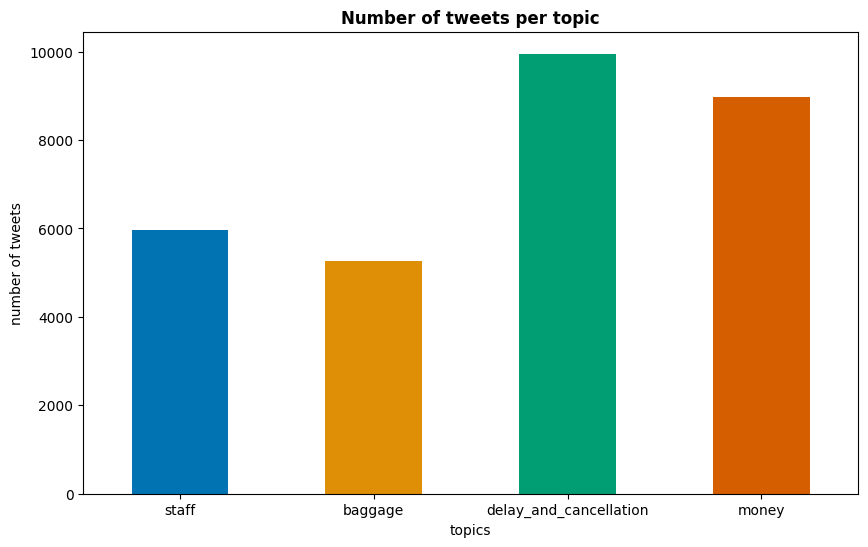

In [24]:
# Number of tweets where an airline was included (mnetioned or responded) per topic- 23s

conv_topics1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE (mentioned_airlines LIKE '%Lufthansa%' 
        OR mentioned_airlines LIKE '%British_Airways%' 
        OR mentioned_airlines LIKE '%KLM%' 
        OR mentioned_airlines LIKE '%AirFrance%')
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""
conv_topics2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE (airline LIKE '%Lufthansa%' 
            OR airline LIKE '%British_Airways%' 
            OR airline LIKE '%KLM%' 
            OR airline LIKE '%AirFrance%')
            AND start >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND start <= UNIX_TIMESTAMP('{end_date}') * 1000
    );
"""
df_topics1 = pd.read_sql(conv_topics1, connection)
df_topics2 = pd.read_sql(conv_topics2, connection)

df_topics = pd.concat([df_topics1, df_topics2], ignore_index=True, axis=0)
df_topics = df_topics.drop_duplicates()

df_topics['datetime'] = pd.to_datetime(df_topics['timestamp_ms'], unit='ms')

df_topics = df_topics.drop(columns=columns_drop)

counts_topics = df_topics.apply(lambda col: col.value_counts().get(1, 0))

plt.figure(figsize=(10,6))
counts_topics.plot(kind='bar', color=sns.color_palette('colorblind'))
plt.xlabel('topics')
plt.ylabel('number of tweets')
plt.title('Number of tweets per topic', weight='bold')
plt.xticks(rotation=0)
plt.show()

/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

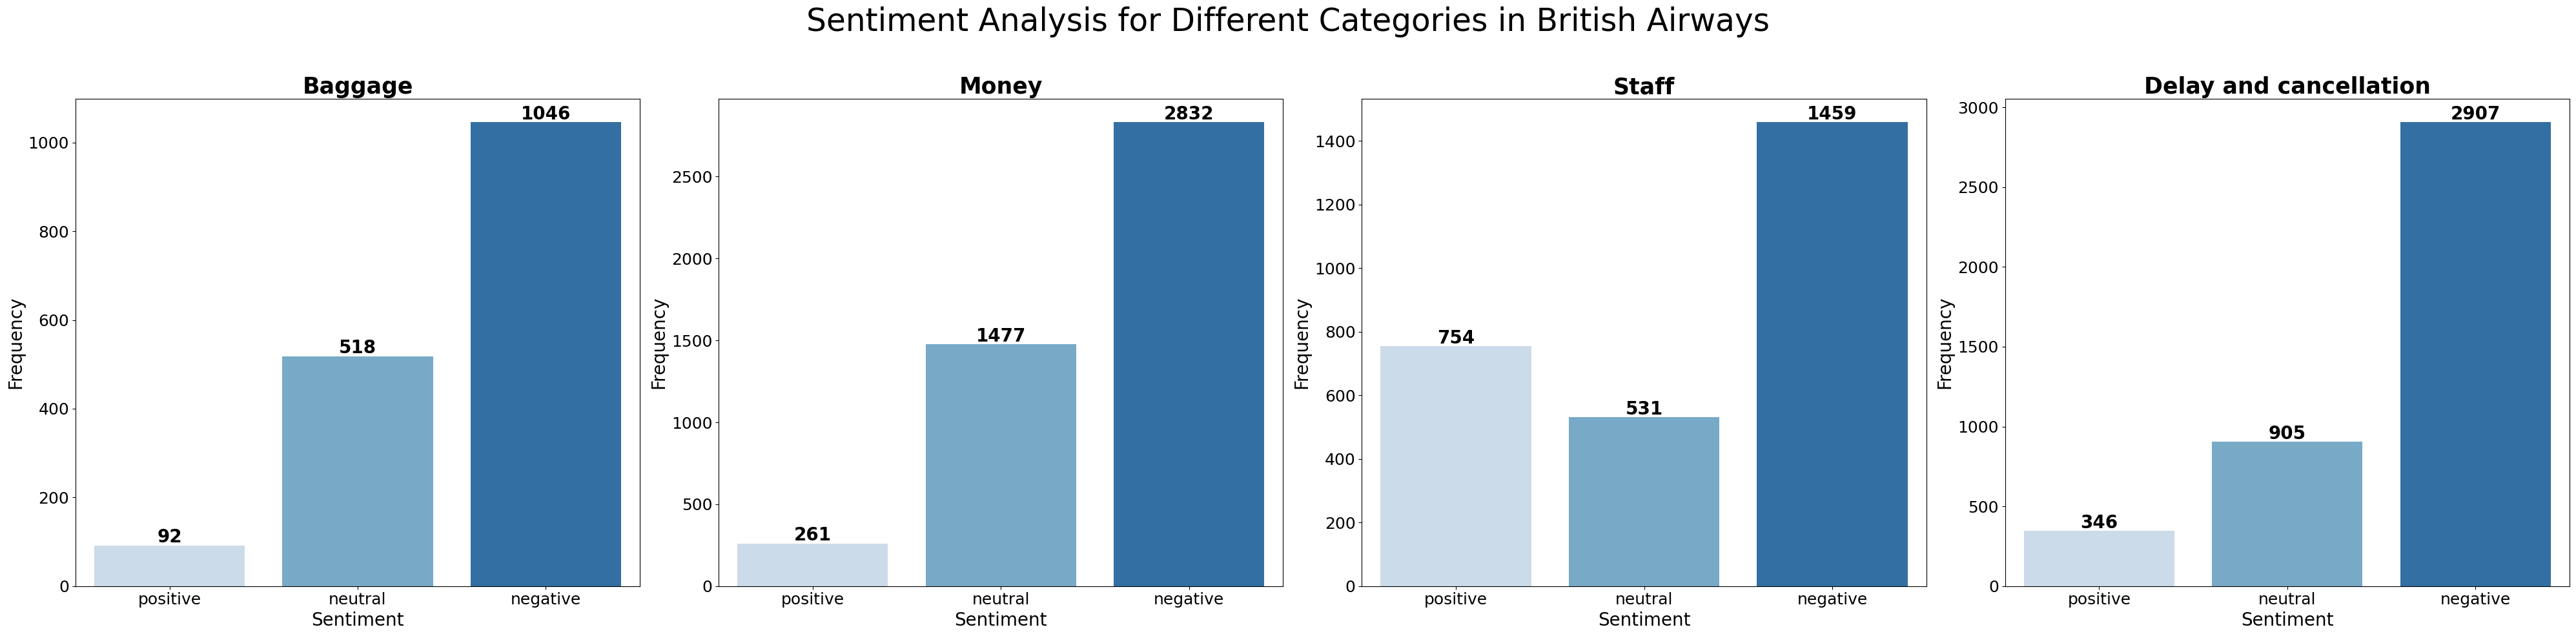

In [25]:
# Sentiment analysis for different topic in British Airrways- 2s

df_ba = df[df['mentioned_airlines'].apply(lambda x: 'British_Airways' in x) | df['user_mentions'].apply(lambda x: '18332190' in x)]

# Plot settings
fig, axs = plt.subplots(1, 4, figsize=(40, 10))
fig.suptitle('Sentiment Analysis for Different Categories in British Airways', fontsize=35)

categories = ['baggage', 'money', 'staff', 'delay_and_cancellation']
sentiments = ['positive', 'neutral', 'negative']

for ax, category in zip(axs.flatten(), categories):
    category_data = df_ba[df_ba[category] == 1]
    
    sentiment_counts = category_data['label'].value_counts().reindex(sentiments, fill_value=0)
    
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues', ax=ax)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=20, weight='bold', color='black')
    
    ax.set_title(category.capitalize().replace('_', ' '), fontsize=25, weight='bold')
    ax.set_xlabel('Sentiment', fontsize=20)
    ax.set_ylabel('Frequency', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jangalic04/anaconda3/envs/JB1010/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

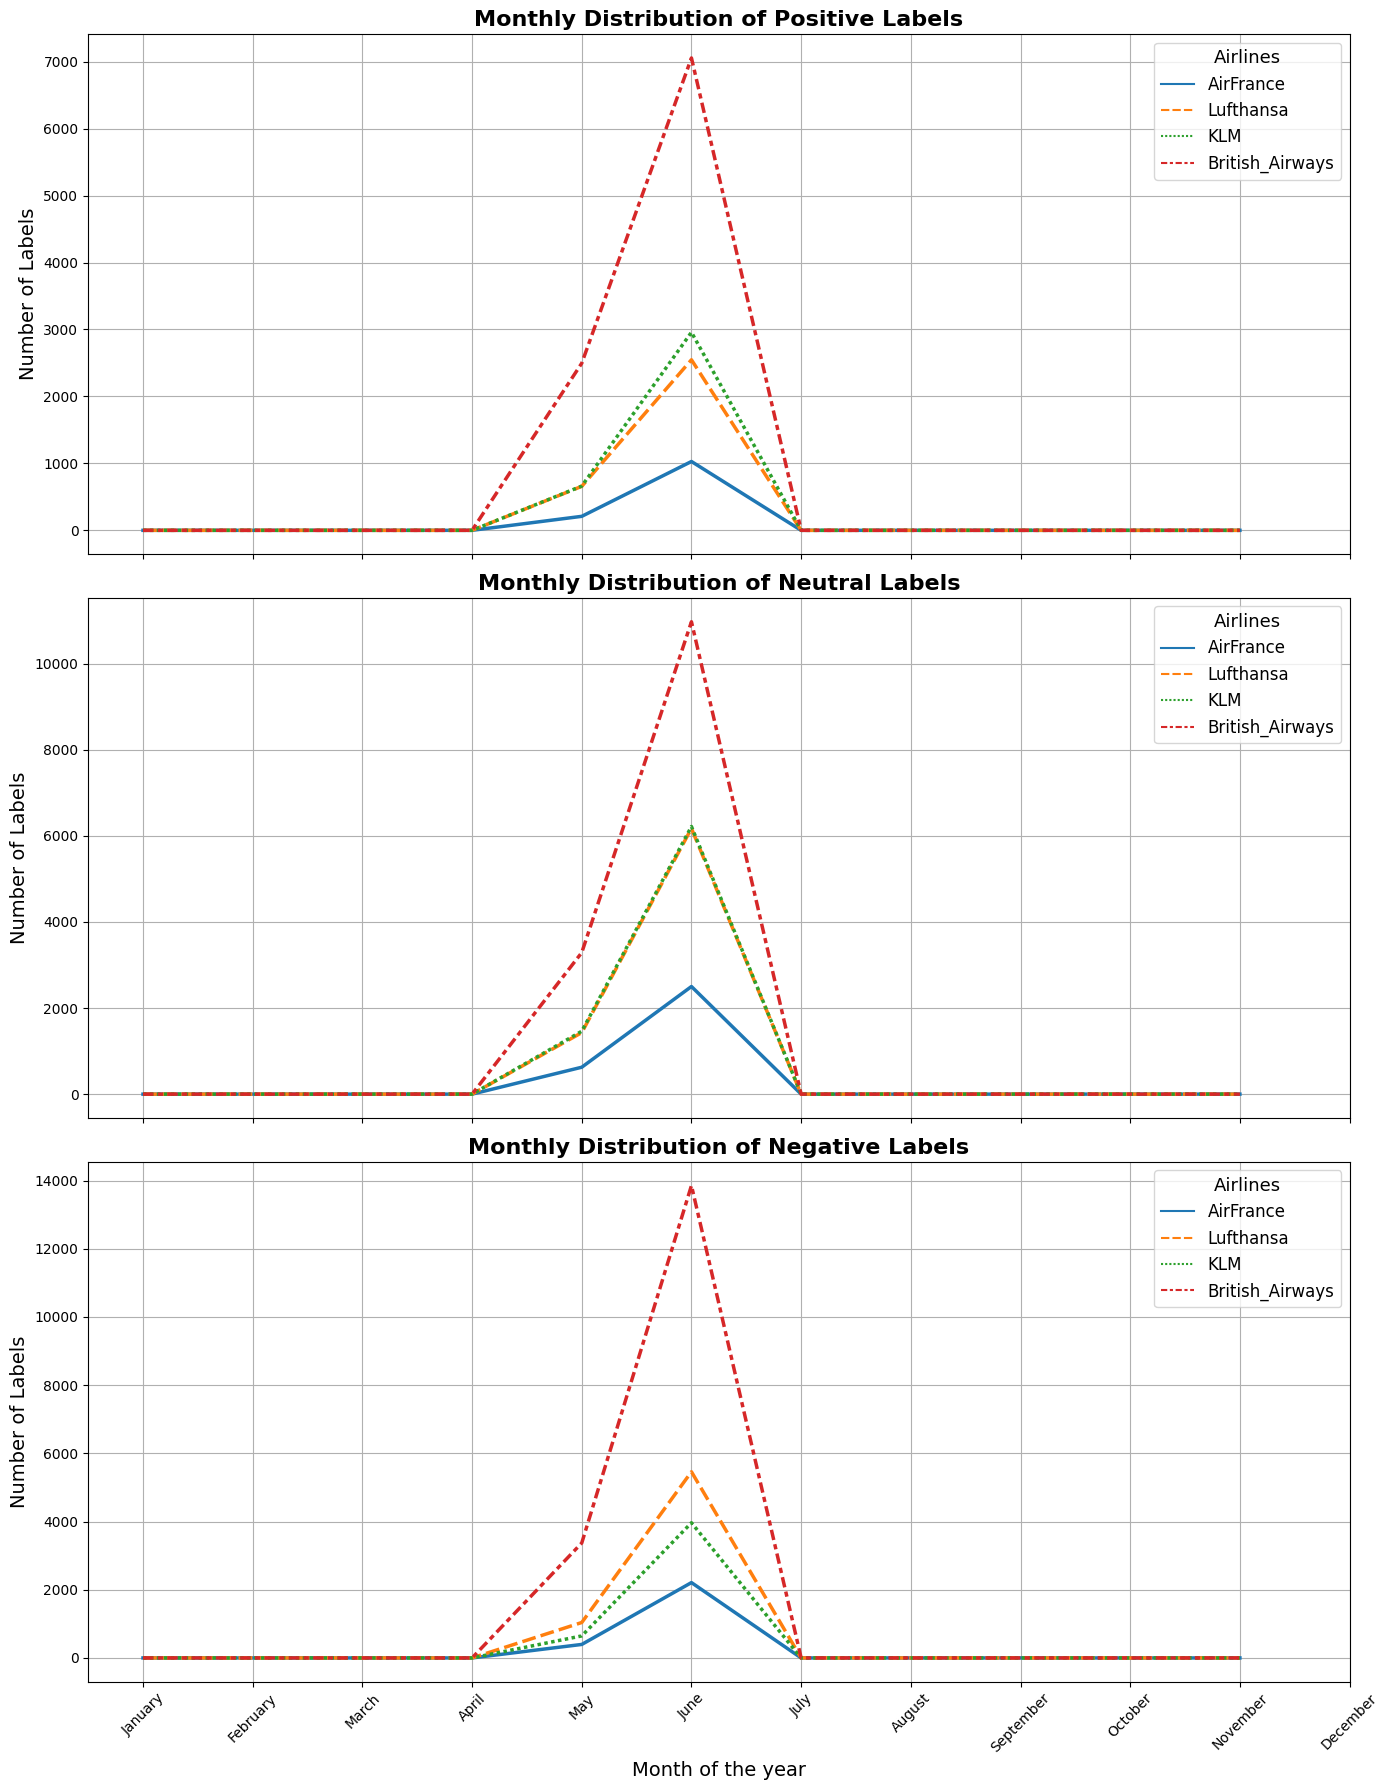

In [26]:
# Monthly distribution of sentiment labels- 2s 

df['AirFrance'] = df['mentioned_airlines'].apply(lambda x: 'AirFrance' in x) | df['user_mentions'].apply(lambda x: '106062176' in x)
df['Lufthansa'] = df['mentioned_airlines'].apply(lambda x: 'Lufthansa' in x) | df['user_mentions'].apply(lambda x: '124476322' in x)
df['KLM'] = df['mentioned_airlines'].apply(lambda x: 'KLM' in x) | df['user_mentions'].apply(lambda x: '56377143' in x)
df['British_Airways'] = df['mentioned_airlines'].apply(lambda x: 'British_Airways' in x) | df['user_mentions'].apply(lambda x: '18332190' in x)

monthly_counts = {sentiment: {airline: [] for airline in airlines_2} for sentiment in sentiments}

for sentiment in sentiments:
    for airline in airlines_2:
        monthly_count = df[df[airline] & (df['label'] == sentiment)].groupby('month').size().reindex(range(1, 12), fill_value=0)
        monthly_counts[sentiment][airline] = monthly_count

df_positive = pd.DataFrame(monthly_counts['positive'])
df_neutral = pd.DataFrame(monthly_counts['neutral'])
df_negative = pd.DataFrame(monthly_counts['negative'])

fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

sns.lineplot(data=df_positive, linewidth=2.5, ax=axs[0])
axs[0].set_title('Monthly Distribution of Positive Labels', fontsize=16, weight='bold')
axs[0].set_ylabel('Number of Labels', fontsize=14)
axs[0].legend(title='Airlines', fontsize=12, title_fontsize='13', loc='upper right')
axs[0].grid(True)

sns.lineplot(data=df_neutral, linewidth=2.5, ax=axs[1])
axs[1].set_title('Monthly Distribution of Neutral Labels', fontsize=16, weight='bold')
axs[1].set_ylabel('Number of Labels', fontsize=14)
axs[1].legend(title='Airlines', fontsize=12, title_fontsize='13', loc='upper right')
axs[1].grid(True)

sns.lineplot(data=df_negative, linewidth=2.5, ax=axs[2])
axs[2].set_title('Monthly Distribution of Negative Labels', fontsize=16, weight='bold')
axs[2].set_ylabel('Number of Labels', fontsize=14)
axs[2].legend(title='Airlines', fontsize=12, title_fontsize='13', loc='upper right')
axs[2].grid(True)

axs[2].set_xlabel('Month of the year', fontsize=14)
axs[2].set_xticks(range(1, 13))
axs[2].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)

plt.tight_layout()
plt.show()


In [3]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_baggage = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.baggage = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey_baggage = pd.read_sql(query_sankey_baggage, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey_baggage['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey_baggage['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey_baggage['datetime'] = df_tweets_british_airways_sankey_baggage['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_baggage = df_tweets_british_airways_sankey_baggage.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_baggage:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways, baggage)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3685489123.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tweets_british_airways_sankey_baggage = pd.read_sql(query_sankey_baggage, connection)


In [4]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_money = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.money = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey_money = pd.read_sql(query_sankey_money, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey_money['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey_money['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey_money['datetime'] = df_tweets_british_airways_sankey_money['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_money = df_tweets_british_airways_sankey_money.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_money:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways, money)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/928426909.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [5]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_staff = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.staff = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey_staff = pd.read_sql(query_sankey_staff, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey_staff['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey_staff['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey_staff['datetime'] = df_tweets_british_airways_sankey_staff['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_staff = df_tweets_british_airways_sankey_staff.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_staff:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways, staff)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3140994019.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [6]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_delay = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.delay_and_cancellation = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey_delay = pd.read_sql(query_sankey_delay, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey_delay['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey_delay['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey_delay['datetime'] = df_tweets_british_airways_sankey_delay['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_delay= df_tweets_british_airways_sankey_delay.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_delay:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways, delay and cancellation)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2574758610.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [7]:
# Define the airline user ID
klm_user_id = 56377143

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_klm_baggage = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%KLM%' 
    AND tweets.baggage = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_klm_sankey_baggage = pd.read_sql(query_sankey_klm_baggage, connection)

# Convert the datetime column to pandas datetime
df_tweets_klm_sankey_baggage['datetime'] = pd.to_datetime(df_tweets_klm_sankey_baggage['timestamp_ms'], unit='ms')

df_tweets_klm_sankey_baggage['datetime'] = df_tweets_klm_sankey_baggage['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_klm_baggage = df_tweets_klm_sankey_baggage.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_klm_baggage:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != klm_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == klm_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (KLM, baggage)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2751504714.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [9]:
# Define the airline user ID
klm_user_id = 56377143

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_klm_money = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%KLM%' 
    AND tweets.money = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_klm_sankey_money = pd.read_sql(query_sankey_klm_money, connection)

# Convert the datetime column to pandas datetime
df_tweets_klm_sankey_money['datetime'] = pd.to_datetime(df_tweets_klm_sankey_money['timestamp_ms'], unit='ms')

df_tweets_klm_sankey_money['datetime'] = df_tweets_klm_sankey_money['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_klm_money = df_tweets_klm_sankey_money.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_klm_money:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != klm_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == klm_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (KLM, money)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2960628046.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [10]:
# Define the airline user ID
klm_user_id = 56377143

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_klm_staff = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%KLM%' 
    AND tweets.staff = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_klm_sankey_staff = pd.read_sql(query_sankey_klm_staff, connection)

# Convert the datetime column to pandas datetime
df_tweets_klm_sankey_staff['datetime'] = pd.to_datetime(df_tweets_klm_sankey_staff['timestamp_ms'], unit='ms')

df_tweets_klm_sankey_staff['datetime'] = df_tweets_klm_sankey_staff['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_klm_staff = df_tweets_klm_sankey_staff.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_klm_staff:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != klm_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == klm_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (KLM, staff)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2321541887.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [11]:
# Define the airline user ID
klm_user_id = 56377143

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_klm_delay = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%KLM%' 
    AND tweets.delay_and_cancellation = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_klm_sankey_delay = pd.read_sql(query_sankey_klm_delay, connection)

# Convert the datetime column to pandas datetime
df_tweets_klm_sankey_delay['datetime'] = pd.to_datetime(df_tweets_klm_sankey_delay['timestamp_ms'], unit='ms')

df_tweets_klm_sankey_delay['datetime'] = df_tweets_klm_sankey_delay['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_klm_delay = df_tweets_klm_sankey_delay.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_klm_delay:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != klm_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == klm_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (KLM, delay and cancellation)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/323112587.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [12]:
# Define the airline user ID
lu_user_id = 124476322

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_lu_baggage = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%Lufthansa%' 
    AND tweets.baggage = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_lu_sankey_baggage = pd.read_sql(query_sankey_lu_baggage, connection)

# Convert the datetime column to pandas datetime
df_tweets_lu_sankey_baggage['datetime'] = pd.to_datetime(df_tweets_lu_sankey_baggage['timestamp_ms'], unit='ms')

df_tweets_lu_sankey_baggage['datetime'] = df_tweets_lu_sankey_baggage['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_lu_baggage = df_tweets_lu_sankey_baggage.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_lu_baggage:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != lu_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == lu_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Lufthansa, baggage)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/953041876.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [13]:
# Define the airline user ID
lu_user_id = 124476322

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_lu_money = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%Lufthansa%' 
    AND tweets.money = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_lu_sankey_money = pd.read_sql(query_sankey_lu_money, connection)

# Convert the datetime column to pandas datetime
df_tweets_lu_sankey_money['datetime'] = pd.to_datetime(df_tweets_lu_sankey_money['timestamp_ms'], unit='ms')

df_tweets_lu_sankey_money['datetime'] = df_tweets_lu_sankey_money['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_lu_money= df_tweets_lu_sankey_money.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_lu_money:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != lu_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == lu_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Lufthansa, money)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3220480049.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [14]:
# Define the airline user ID
lu_user_id = 124476322

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_lu_staff = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%Lufthansa%' 
    AND tweets.staff = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_lu_sankey_staff = pd.read_sql(query_sankey_lu_staff, connection)

# Convert the datetime column to pandas datetime
df_tweets_lu_sankey_staff['datetime'] = pd.to_datetime(df_tweets_lu_sankey_staff['timestamp_ms'], unit='ms')

df_tweets_lu_sankey_staff['datetime'] = df_tweets_lu_sankey_staff['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_lu_staff = df_tweets_lu_sankey_staff.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_lu_staff:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != lu_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == lu_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Lufthansa, staff)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/1497249650.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [15]:
# Define the airline user ID
lu_user_id = 124476322

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_lu_delay = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%Lufthansa%' 
    AND tweets.delay_and_cancellation = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_lu_sankey_delay = pd.read_sql(query_sankey_lu_delay, connection)

# Convert the datetime column to pandas datetime
df_tweets_lu_sankey_delay['datetime'] = pd.to_datetime(df_tweets_lu_sankey_delay['timestamp_ms'], unit='ms')

df_tweets_lu_sankey_delay['datetime'] = df_tweets_lu_sankey_delay['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_lu_delay= df_tweets_lu_sankey_delay.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_lu_delay:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != lu_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == lu_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Lufthansa, delay and cancellation)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3257602100.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [16]:
# Define the airline user ID
af_user_id = 106062176

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_af_baggage = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%AirFrance%' 
    AND tweets.baggage = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_af_sankey_baggage = pd.read_sql(query_sankey_af_baggage, connection)

# Convert the datetime column to pandas datetime
df_tweets_af_sankey_baggage['datetime'] = pd.to_datetime(df_tweets_af_sankey_baggage['timestamp_ms'], unit='ms')

df_tweets_af_sankey_baggage['datetime'] = df_tweets_af_sankey_baggage['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_af_baggage = df_tweets_af_sankey_baggage.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_af_baggage:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != af_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == af_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Air France, baggage)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/4111271398.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [17]:
# Define the airline user ID
af_user_id = 106062176

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_af_money = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%AirFrance%' 
    AND tweets.money = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_af_sankey_money = pd.read_sql(query_sankey_af_money, connection)

# Convert the datetime column to pandas datetime
df_tweets_af_sankey_money['datetime'] = pd.to_datetime(df_tweets_af_sankey_money['timestamp_ms'], unit='ms')

df_tweets_af_sankey_money['datetime'] = df_tweets_af_sankey_money['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_af_money = df_tweets_af_sankey_money.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_af_money:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != af_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == af_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Air France, money)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/3082657357.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [18]:
# Define the airline user ID
af_user_id = 106062176

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_af_staff = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%AirFrance%' 
    AND tweets.staff = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_af_sankey_staff = pd.read_sql(query_sankey_af_staff, connection)

# Convert the datetime column to pandas datetime
df_tweets_af_sankey_staff['datetime'] = pd.to_datetime(df_tweets_af_sankey_staff['timestamp_ms'], unit='ms')

df_tweets_af_sankey_staff['datetime'] = df_tweets_af_sankey_staff['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_af_staff = df_tweets_af_sankey_staff.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_af_staff:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != af_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == af_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Air France, staff)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/349393525.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [19]:
# Define the airline user ID
af_user_id = 106062176

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_af_delay = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%AirFrance%' 
    AND tweets.delay_and_cancellation = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_af_sankey_delay = pd.read_sql(query_sankey_af_delay, connection)

# Convert the datetime column to pandas datetime
df_tweets_af_sankey_delay['datetime'] = pd.to_datetime(df_tweets_af_sankey_delay['timestamp_ms'], unit='ms')

df_tweets_af_sankey_delay['datetime'] = df_tweets_af_sankey_delay['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_af_delay = df_tweets_af_sankey_delay.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_af_delay:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != af_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == af_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Air France, delay and cancellation)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_30315/2156415197.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [3]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_ba_general = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey = pd.read_sql(query_sankey_ba_general, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey['datetime'] = df_tweets_british_airways_sankey['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_ba = df_tweets_british_airways_sankey.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_ba:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_31738/2614978584.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tweets_british_airways_sankey = pd.read_sql(query_sankey_ba_general, connection)


In [4]:
# Define the airline user ID
klm_user_id = 56377143

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_klm = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%KLM%' 
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_klm_sankey = pd.read_sql(query_sankey_klm, connection)

# Convert the datetime column to pandas datetime
df_tweets_klm_sankey['datetime'] = pd.to_datetime(df_tweets_klm_sankey['timestamp_ms'], unit='ms')

df_tweets_klm_sankey['datetime'] = df_tweets_klm_sankey['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_klm = df_tweets_klm_sankey.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_klm:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != klm_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == klm_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (KLM)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_31738/1034621335.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [5]:
# Define the airline user ID
lu_user_id = 124476322

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_lu = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%Lufthansa%' 
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_lu_sankey = pd.read_sql(query_sankey_lu, connection)

# Convert the datetime column to pandas datetime
df_tweets_lu_sankey['datetime'] = pd.to_datetime(df_tweets_lu_sankey['timestamp_ms'], unit='ms')

df_tweets_lu_sankey['datetime'] = df_tweets_lu_sankey['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_lu= df_tweets_lu_sankey.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_lu:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != lu_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == lu_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Lufthansa)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_31738/795846538.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [6]:
# Define the airline user ID
af_user_id = 106062176

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_af = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%AirFrance%' 
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_af_sankey = pd.read_sql(query_sankey_af, connection)

# Convert the datetime column to pandas datetime
df_tweets_af_sankey['datetime'] = pd.to_datetime(df_tweets_af_sankey['timestamp_ms'], unit='ms')

df_tweets_af_sankey['datetime'] = df_tweets_af_sankey['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_af = df_tweets_af_sankey.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_af:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != af_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == af_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (Air France)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_31738/851675400.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

